# Data Analytics

Business analytics is used by companies that are committed to making data-driven decisions. It is the science of analysing data to find out patterns that will be helpful in developing strategies. Its usage can be found in almost every industry.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Understanding the Data



In [3]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/TSF/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# The size of the dataset
df.shape 

(9994, 13)

In [5]:
# Unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Only integer columns details are shown
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Cleaning the Data

In [8]:
df.isnull().sum()  # 0 means no null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
 #To know if there are any duplicate values present or not
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.duplicated().sum()

0

#### Relationship between Integer Values

In [12]:
corelation = df.corr()

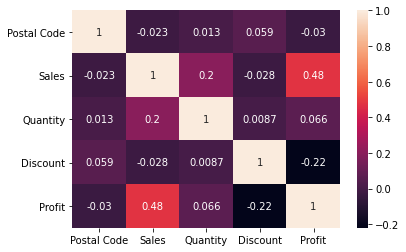

In [13]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

### Exploratory Data Analysis

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

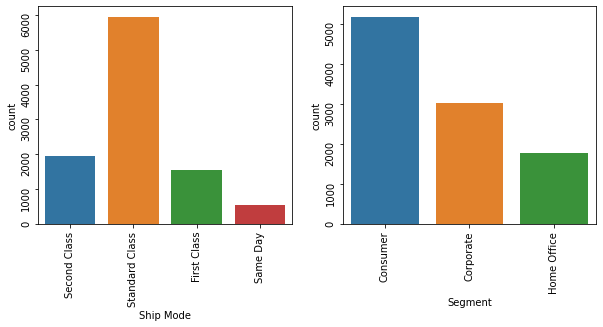

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.countplot(x=df['Ship Mode'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.subplot(122)
sns.countplot(x=df['Segment'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)


From the above graphs, I can deduce that

1.   Maximum ship mode is of Standard Class 
2.   Major Segement is for Consumer and least for Home Office



(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

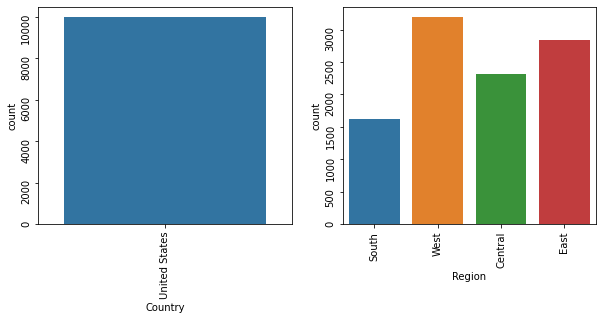

In [15]:

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x=df['Country'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.subplot(122)
sns.countplot(x=df['Region'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)

From the above graphs, I can deduce that

1.   All the items are sold within United States only.
2.   Majority of West and East population are shopping from this Super Store.

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

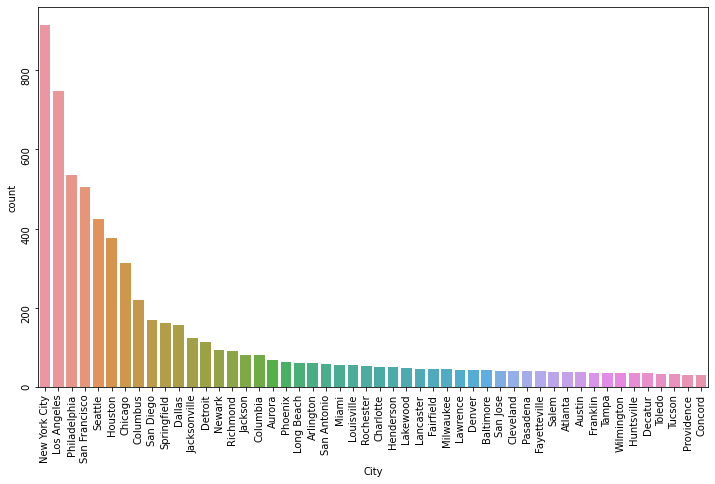

In [16]:
plt.figure(figsize=(12,7))

sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.yticks(rotation=90)

The above graph shows the density of Consumers of the Store according to City.

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

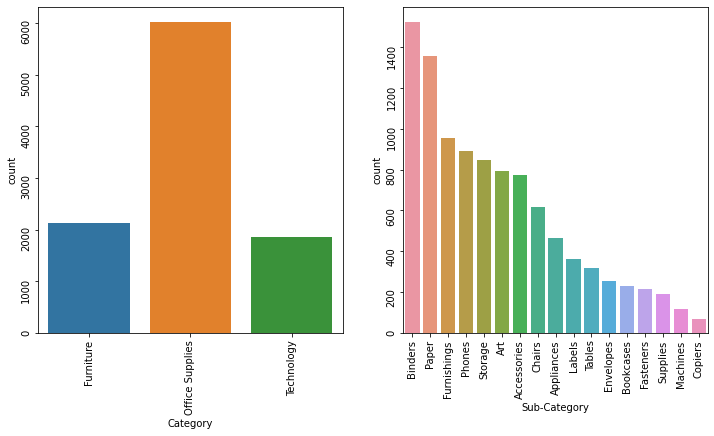

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.subplot(122)
sns.countplot(x=df['Sub-Category'], order=(df['Sub-Category'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.yticks(rotation=90)

From the above graphs, I can deduce that

1.   Maximum items that sold are of Office Supplies.
2.   Majority of items that sold are Binders and Paper.

(array([-8000., -6000., -4000., -2000.,     0.,  2000.,  4000.,  6000.,
         8000., 10000.]), <a list of 10 Text major ticklabel objects>)

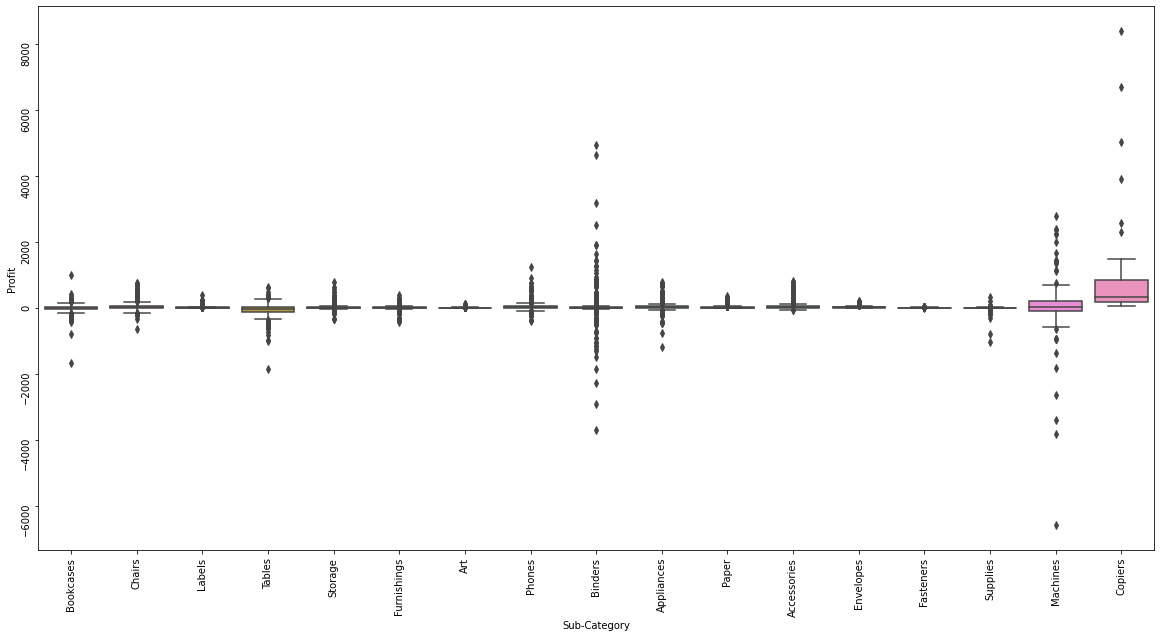

In [33]:
plt.figure(figsize=(20, 10))

sns.boxplot(x = "Sub-Category", y= "Profit", data = df)

plt.xticks(rotation=90)
plt.yticks(rotation=90)

From the above graphs, I can deduce that

1.   That the Super Store get Maximum Profit from Copiers.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


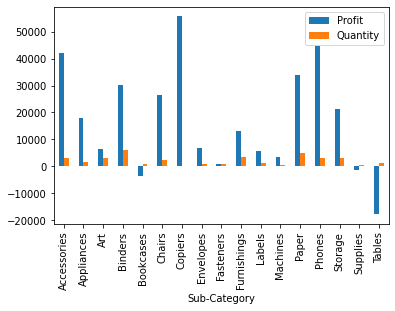

In [37]:
f = df.groupby('Sub-Category')['Profit', 'Quantity'].sum().plot.bar()

From the above graphs, I can deduce that


1.   Copiers gives the maximum profit to Super Store.
2.   Binders and Papers have maximum items that are sold.


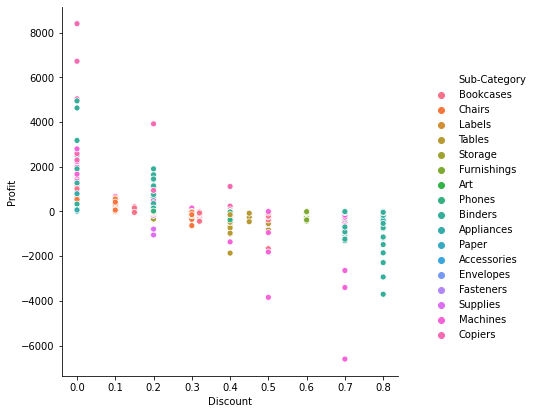

In [40]:
g = sns.relplot(x="Discount", y="Profit", hue="Sub-Category", data=df)

g.fig.set_figwidth(8)
g.fig.set_figheight(6)

From the above graphs, I can deduce that


1.   Copiers is the items that give maximum profit and it show variation in different Discount range.
2.   Phones, Binders and Paper are also distributed in 0.2 and 0.8 Discount range but gave less profit when sold at 0.8 discount.


